Data source:https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

Import the package we are going to use:

In [1001]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import numpy as np
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from PIL import Image
from os import path
import statistics as stats
from sklearn.linear_model import LinearRegression

Open the dataset:

In [787]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

And we can see the number of host in different area of New York City:

From the chart below, we know most of the hosts are based on Manhattan and Brooklyn, and Staten Island has the minimum number of host.

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


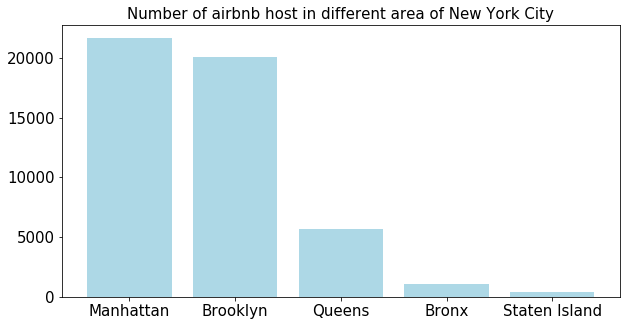

In [4]:
neighbourhood_original = df[['neighbourhood_group']]
counts_of_host = neighbourhood_original['neighbourhood_group'].value_counts()
counts_of_host = [counts_of_host[0],counts_of_host[1],counts_of_host[2],counts_of_host[3],counts_of_host[4]]
label_of_area = ['Manhattan','Brooklyn','Queens','Bronx','Staten Island']
y_pos = np.arange(len(label_of_area))

plt.figure(figsize = (10,5))
plt.bar(y_pos,counts_of_host,align = 'center',alpha = 1,color = 'lightblue')
plt.xticks(y_pos,label_of_area,fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Number of airbnb host in different area of New York City",fontsize = 15)
print(neighbourhood_original['neighbourhood_group'].value_counts())
plt.show()

And host type, from the pie chart below we know most of(more than 50 per cent) hosts in New York are entire home or apartment.

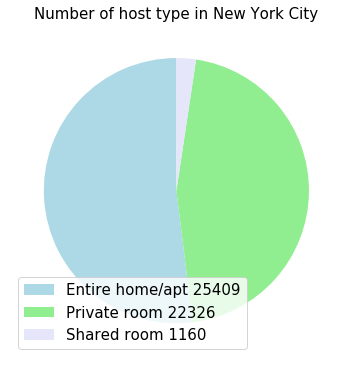

In [1052]:
room_type = df[['room_type']]['room_type'].value_counts()
room_type_count = [room_type[0],room_type[1],room_type[2]]
room_type_label = ["Entire home/apt 25409",'Private room 22326','Shared room 1160']
colours = ["lightblue","lightgreen","lavender"]
plt.figure(figsize = (15,5))
plt.pie(room_type_count,colors = colours, startangle = 90)
plt.legend(room_type_label,loc = 'best',fontsize = 15)
plt.tight_layout()
plt.title('Number of host type in New York City',fontsize = 15)
plt.show()

Then, we can analyse the name of host, find is there any information can be given by host name:

Firstly, we separate data group by different district, like below:

In [127]:
manhattan = list(df.loc[df['neighbourhood_group'] == 'Manhattan']['name'])
brooklyn = list(df.loc[df['neighbourhood_group'] == 'Brooklyn']['name'])
queens = list(df.loc[df['neighbourhood_group'] == 'Queens']['name'])
bronx = list(df.loc[df['neighbourhood_group'] == 'Bronx']['name'])
staten_island = list(df.loc[df['neighbourhood_group'] == 'Staten Island']['name'])

In [1053]:
def wordcloud_prepare(a_list):
    a_string = str(a_list)
    translator = str.maketrans('','',string.punctuation)
    remove_punctuation = a_string.translate(translator)
    remove_number = ''.join([i for i in remove_punctuation if not i.isdigit()])
    lower_case = remove_number.lower()
    new_list = lower_case.split()
    stopword = list(set(stopwords.words('english')))
    stopword.extend(('new','york','nyc','ny'))
    final_list = [word for word in new_list if word not in stopword]
    final_string = " ".join(final_list)
    return final_string
# The function remove all numbers and stopwords in the list, and convert list to string.

def generate_wordcloud(words):
    pic = np.array(Image.open("manhattan.png"))
    word_cloud = WordCloud(width = 512, height = 512, background_color='white',mask = pic).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
#The function create a wordcloud based on the string created above.

In [176]:
manhattan = wordcloud_prepare(manhattan)
brooklyn = wordcloud_prepare(brooklyn)
queens = wordcloud_prepare(queens)
bronx = wordcloud_prepare(bronx)
staten_island = wordcloud_prepare(staten_island)

Wordcloud of airbnb name in Manhattan:


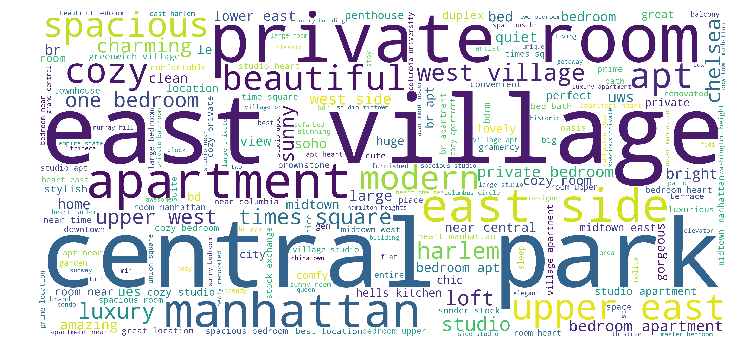

Wordcloud of airbnb name in Brooklyn:


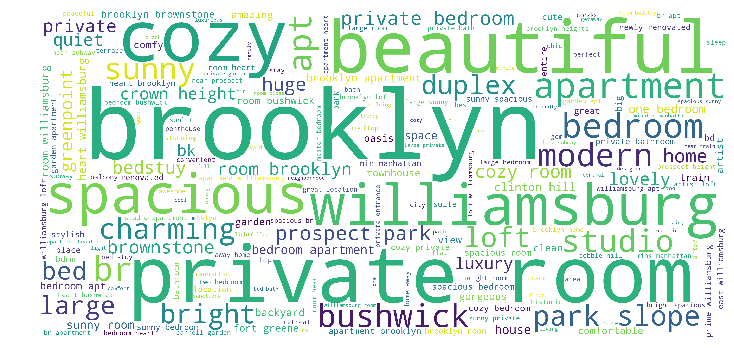

Wordcloud of airbnb name in Queens:


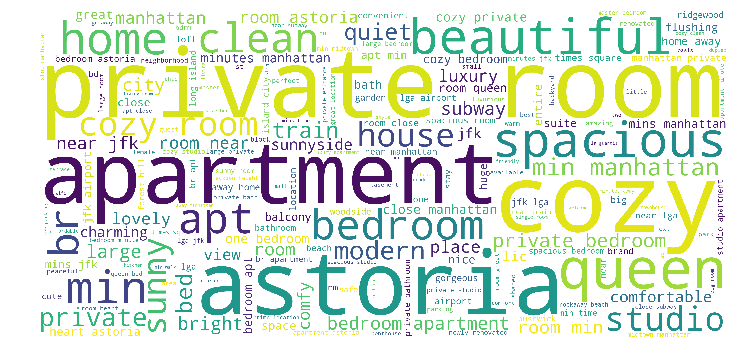

Wordcloud of airbnb name in Bronx:


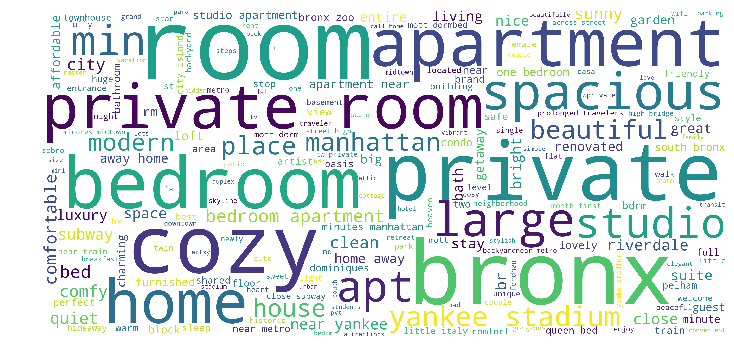

Wordcloud of airbnb name in Staten Island:


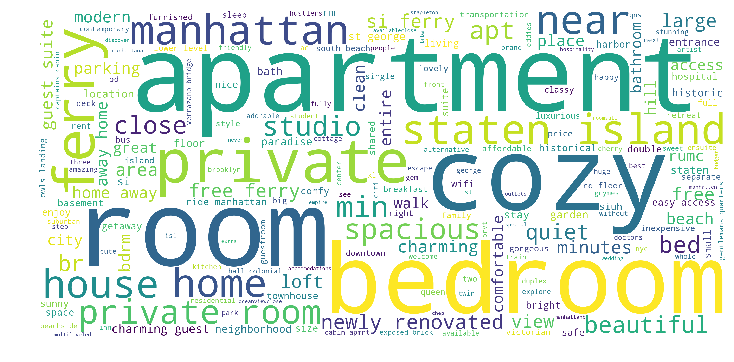

In [177]:
print('Wordcloud of airbnb name in Manhattan.')
generate_wordcloud(manhattan)
print('Wordcloud of airbnb name in Brooklyn:')
generate_wordcloud(brooklyn)
print('Wordcloud of airbnb name in Queens:')
generate_wordcloud(queens)
print('Wordcloud of airbnb name in Bronx:')
generate_wordcloud(bronx)
print('Wordcloud of airbnb name in Staten Island:')
generate_wordcloud(staten_island)

According to the wordclouds above, it is obvious that the host in New York will bind their real property with famous scenic spot, such as East Village, Central Park, Time Square or Yankee stadium in Bronx. in Queens and Brooklyn, they use name includes Astoria and Williamsburg, which are on the opposite side of Manhattan. And in all four district, "private" or "private room" are frequently used in many branches. 

Then, we draw boxplot to analyse the price data.

Like what we already did above, we split the dataframe to meet our requirement:

In [198]:
manhattan_price = list(df.loc[df['neighbourhood_group'] == 'Manhattan'][['price']]['price'])
brooklyn_price = list(df.loc[df['neighbourhood_group'] == 'Brooklyn'][['price']]['price'])
queens_price = list(df.loc[df['neighbourhood_group'] == 'Queens'][['price']]['price'])
bronx_price = list(df.loc[df['neighbourhood_group'] == 'Bronx'][['price']]['price'])
staten_island_price = list(df.loc[df['neighbourhood_group'] == 'Bronx'][['price']]['price'])
boxplot_data = [manhattan_price,brooklyn_price, queens_price, bronx_price, staten_island_price]

Then, we use the dataset we generated at the last step to draw a boxplot:

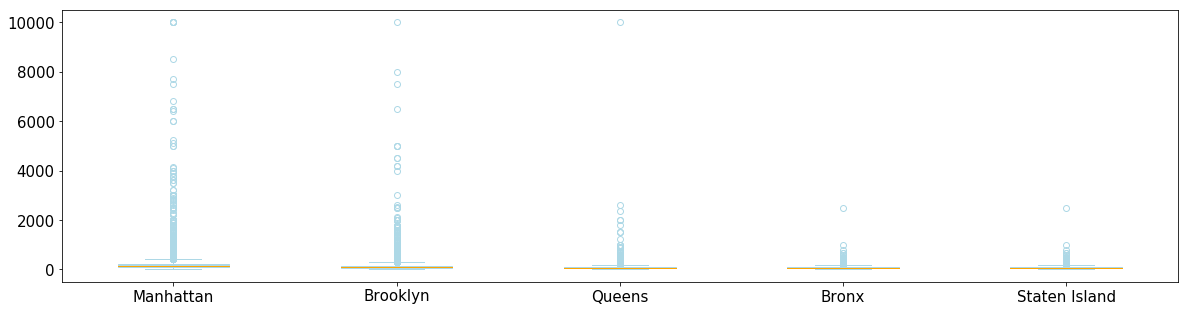

In [227]:
plt.figure(figsize = (20,5))
plt.boxplot(boxplot_data,patch_artist = True, labels = ['Manhattan','Brooklyn','Queens','Bronx','Staten Island'],
           boxprops=dict(facecolor="lightblue", color="lightblue"),
            capprops=dict(color="lightblue"),
            whiskerprops=dict(color="lightblue"),
            flierprops=dict(color="lightblue", markeredgecolor="lightblue"),
            medianprops=dict(color='orange'))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

But the result of boxplot is not very satisfied. Even ignore the orange line at very bottom of chart, in our common sense, although the price of airbnb in metropolitan such as New York and London are much more expensive than small city, the airbnb cost more than 500 US dollar per night is very uncommon. Hence, we fliter the outlier by limiting the , and draw a boxplot again:

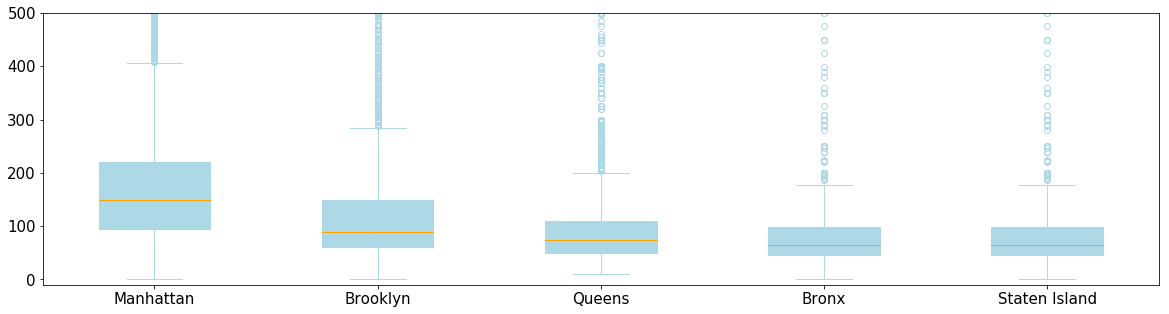

In [228]:
plt.figure(figsize = (20,5))
plt.boxplot(boxplot_data,patch_artist = True, labels = ['Manhattan','Brooklyn','Queens','Bronx','Staten Island'],
           boxprops=dict(facecolor="lightblue", color="lightblue"),
            capprops=dict(color="lightblue"),
            whiskerprops=dict(color="lightblue"),
            flierprops=dict(color="lightblue", markeredgecolor="lightblue"),
            medianprops=dict(color='orange'))
axes = plt.gca()
axes.set_ylim([-10,500])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

So, we have the consequential price boxplot in different district.

Finally, we can use geographic location and price to see the price based on geographic data such as longitude and latitude. Still, we limit the range of colour bar to fliter outliers:

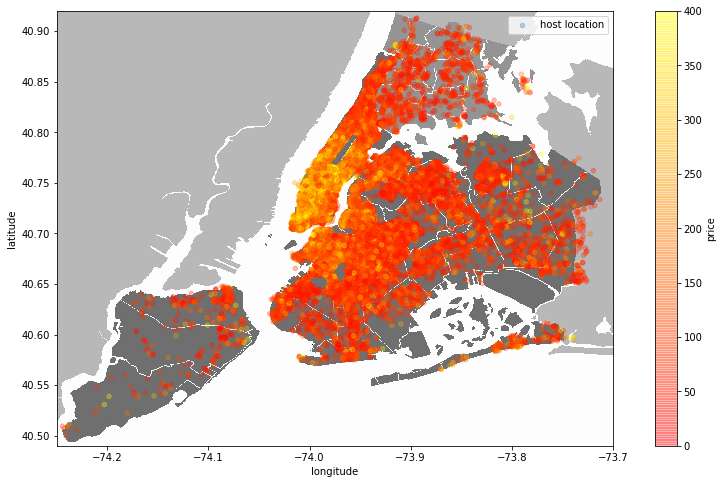

In [1089]:
geodata_price = df[['latitude','longitude','price']]
plt.figure(figsize=(15,8))
nyc_img=plt.imread('New_York_City_.jpg')
# plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
plt.imshow(nyc_img,zorder=0,extent=[-74.25, -73.7, 40.49,40.92])
ax=plt.gca()
geodata_price.plot(kind='scatter', x='longitude', y='latitude', label='host location', c='price', ax=ax, 
           cmap=plt.get_cmap('autumn'), colorbar=True, vmin = 0,vmax = 400,alpha=0.3, zorder=5)
plt.legend()
plt.show()

From earlier research, we already know the average price of Manhattan is the highest, but the map plot above also shows even in other district, such as Brooklyn and Queens, hosts near Manhattan(such as Willamsburg and Astoria) are more expensive than the host away from Manhattan.

In [ ]:
Then, we try to train an linear regression model to predict 

In [836]:
df_machine_learning = df[['price',
                          'minimum_nights',
                          'number_of_reviews',
                          'reviews_per_month',
                          'calculated_host_listings_count',
                          'availability_365']]

In [867]:
def corr(lists,list_name):
    new_list = []
    for each in lists:
        if each != 1:
            new_list.append(each)
        else:
            continue
    print('The maximum correlation value of ' + str(list_name) + ' is ' + str(max(new_list)))
    print('The minimum correlation value of ' + str(list_name) + ' is ' + str(min(new_list)))
    print()

In [868]:
corr(list(df_machine_learning.corr()['price']),'price_info')
corr(list(df_machine_learning.corr()['minimum_nights']),'minimum_nights_info')
corr(list(df_machine_learning.corr()['reviews_per_month']),'reviews_info')
corr(list(df_machine_learning.corr()['calculated_host_listings_count']),'hostlisting_info')
corr(list(df_machine_learning.corr()['availability_365']),'availability_info')

The maximum correlation value of price_info is 0.08182882742169546
The minimum correlation value of price_info is -0.047954226582658625

The maximum correlation value of minimum_nights_info is 0.14430306319926703
The minimum correlation value of minimum_nights_info is -0.12170220090073355

The maximum correlation value of reviews_info is 0.549867506377439
The minimum correlation value of reviews_info is -0.12170220090073355

The maximum correlation value of hostlisting_info is 0.2257013721911263
The minimum correlation value of hostlisting_info is -0.0723760605417561

The maximum correlation value of availability_info is 0.2257013721911263
The minimum correlation value of availability_info is 0.08182882742169546



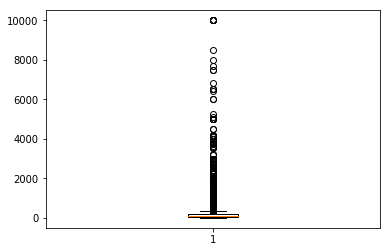

In [835]:
plt.figure()
plt.boxplot(list(df_machine_learning['price']))
plt.show()

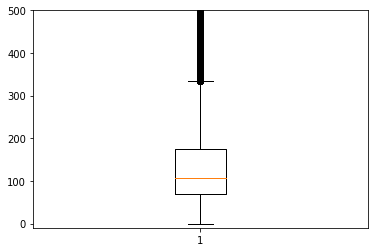

In [851]:
plt.figure()
plt.boxplot(list(df_machine_learning['price']))
axes = plt.gca()
axes.set_ylim([-10,500])
plt.show()

In [1039]:
smaller_dataset = df.loc[df['price'] <= 325]
smaller_dataset = smaller_dataset[smaller_dataset.price != 0]
smaller_dataset = smaller_dataset[['price',
                                   'host_id',
                                   'minimum_nights',
                                   'latitude',
                                   'longitude',
                                   'number_of_reviews',
                                   'reviews_per_month',
                                   'calculated_host_listings_count',
                                   'availability_365']]
smaller_dataset = smaller_dataset.fillna(smaller_dataset.mean()[3])

In [887]:
corr(list(smaller_dataset.corr()['price']),'price_info')
corr(list(smaller_dataset.corr()['minimum_nights']),'minimum_nights_info')
corr(list(smaller_dataset.corr()['reviews_per_month']),'reviews_info')
corr(list(smaller_dataset.corr()['calculated_host_listings_count']),'hostlisting_info')
corr(list(smaller_dataset.corr()['availability_365']),'availability_info')

The maximum correlation value of price_info is 0.17215658875770748
The minimum correlation value of price_info is -0.03155709080506011

The maximum correlation value of minimum_nights_info is 0.1463478705395294
The minimum correlation value of minimum_nights_info is -0.0966158385500616

The maximum correlation value of reviews_info is 0.5371851082772928
The minimum correlation value of reviews_info is -0.0966158385500616

The maximum correlation value of hostlisting_info is 0.22570907500334872
The minimum correlation value of hostlisting_info is -0.07013162999142959

The maximum correlation value of availability_info is 0.22570907500334872
The minimum correlation value of availability_info is 0.06531637427912294



In [1016]:
# The function below was used for make a linear regression model to predict the price of each district,
# but the accuracy of the model is not satisfied. I check other people's result on Kaggle found the same problem.

# def predict_price(dataset):
#     predicted = []
#     actual = []
    
#     split = int(len(dataset)*0.6)
#     training = dataset[:split]
#     testing = dataset[split:]
#     source = training.drop('price',axis = 1)
    
#     model = LinearRegression()
#     model.fit(source,training['price'])
    
#     print("Model intercept is", model.intercept_)
#     print("Model slope is", model.coef_)
    
#     for each in range(len(testing)):
#         temp = testing[each:each+1]
#         dropped = temp.drop('price',axis = 1)
#         predicted.append(int(model.predict(dropped)))
#         actual.append(int(testing['price'].iloc[each]))
    
#     plt.figure(figsize = (15,15))
#     plt.plot(actual,predicted,'o')
#     plt.xlabel('actual value')
#     plt.ylabel('predicted value')
#     plt.show()

Model intercept is 117.54554097178233
Model slope is [ 0.05912837 -0.04441546  0.03248111]


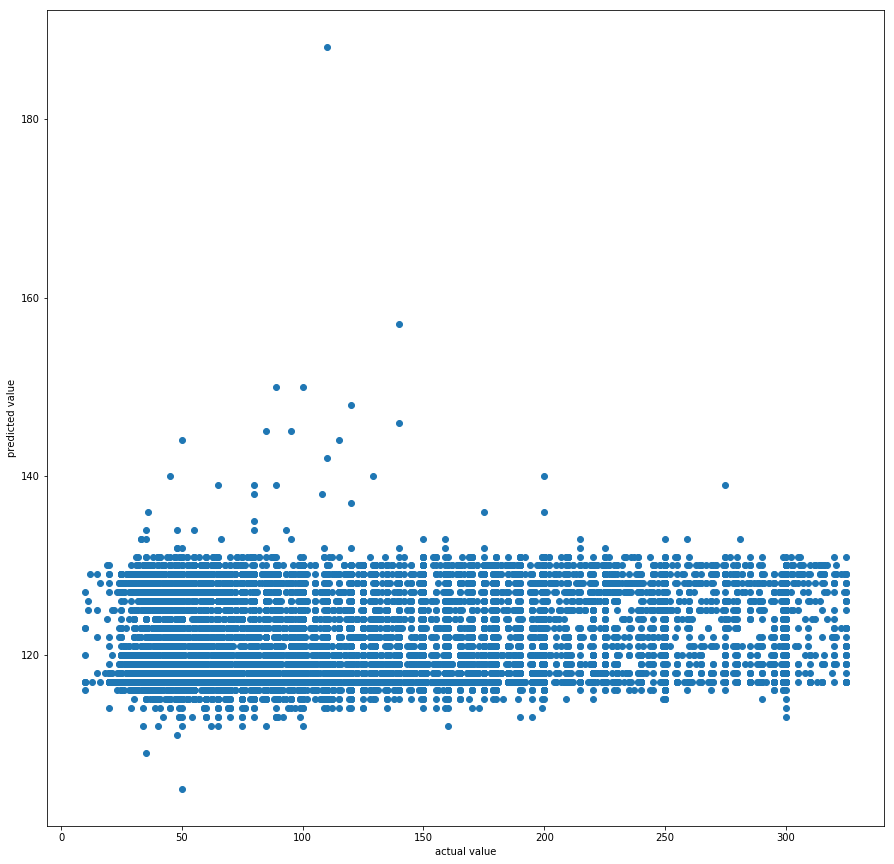

In [1040]:
predict(smaller_dataset)